In this notebook, I will write a function that tells whether a wrestler has seven wins in the current tournament.

First, we'll make a pandas dataframe.

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

#Add the path to the folder that contains the data. Makes it easier for each of us to use the notebook
path = "/Users/Kyla/Desktop/ErdosDataScienceWork/Project/data/"
#path = "/Users/es/Projects/erdo/sumo/Erdos-Institute-Fall-2024-Project-Sumo/data/"

df1983 = pd.read_csv(path+str(1983)+'.csv')
df1984 = pd.read_csv(path+str(1984)+'.csv')

df = df1983
for year in range(1984,2020):
    year = str(year)
    dfyear = pd.read_csv(path+year+'.csv')
    df = pd.concat([df, dfyear], axis=0, ignore_index=True)

In [2]:
from sumo import *

df = add_col_for_penultimate_day_7_wins(df)
df = get_ordinal_rank(df)
df = get_how_long_in_sumo(df)

In [3]:
df

,index,basho,day,rikishi1_id,rikishi1_rank,rikishi1_shikona,rikishi1_result,rikishi1_win,kimarite,rikishi2_id,...,rikishi2_win,rikishi1_wins_in_tournament,rikishi2_wins_in_tournament,rikishi1_penultimate_day_7_wins,rikishi2_penultimate_day_7_wins,rikishi1_sortable_rank,ordinal_rank,year,rikishi1_years_in_sumo,rikishi2_years_in_sumo
0,0,1983.01,1,4140,J13w,Chikubayama,0-1 (7-8),0,yorikiri,4306,...,1,0,1,None,None,6132,78,1983,1,1
3663,3663,1983.09,1,4132,J1e,Wakanofuji,0-1 (5-10),0,oshidashi,1337,...,1,0,1,None,None,6011,53,1983,1,1
3662,3662,1983.09,1,1337,M13e,Tochitsukasa,1-0 (7-8),1,oshidashi,4132,...,0,1,0,None,None,5131,43,1983,1,1
3661,3661,1983.09,1,4311,J2e,Hakuryu,0-1 (5-10),0,oshidashi,4118,...,1,0,1,None,None,6021,55,1983,1,1
3660,3660,1983.09,1,4118,J1w,Amanoyama,1-0 (11-4),1,oshidashi,4311,...,0,1,0,None,None,6012,54,1983,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211457,1659,2019.03,10,12291,M8e,Asanoyama,7-3 (7-8),1,hatakikomi,12051,...,0,7,6,None,None,5081,33,2019,3,6
211456,1658,2019.03,10,12051,M15e,Ishiura,6-4 (6-9),0,hatakikomi,12291,...,1,6,7,None,None,5151,47,2019,6,3
211455,1657,2019.03,10,6491,M9w,Ikioi,1-9 (2-13),0,yorikiri,5967,...,1,1,7,None,None,5092,36,2019,10,15
211462,1664,2019.03,10,11728,M7w,Takarafuji,4-6 (8-7),0,tsukiotoshi,11934,...,1,4,6,None,None,5072,32,2019,10,9


In [28]:
df.sort_index()

,index,basho,day,rikishi1_id,rikishi1_rank,rikishi1_shikona,rikishi1_result,rikishi1_win,kimarite,rikishi2_id,...,rikishi1_wins_in_tournament,rikishi2_wins_in_tournament,rikishi1_penultimate_day_7_wins,rikishi2_penultimate_day_7_wins,rikishi1_sortable_rank,ordinal_rank,year,rikishi1_years_in_sumo,rikishi2_years_in_sumo,years_in_sumo_difference
0,0,1983.01,1,4140,J13w,Chikubayama,0-1 (7-8),0,yorikiri,4306,...,0,1,None,None,6132,78,1983,1,1,0
1,1,1983.01,1,4306,Ms1e,Ofuji,1-0 (6-1),1,yorikiri,4140,...,1,0,None,None,7011,81,1983,1,1,0
2,2,1983.01,1,1337,J12w,Tochitsukasa,1-0 (9-6),1,oshidashi,4323,...,1,0,None,None,6122,76,1983,1,1,0
3,3,1983.01,1,4323,J13e,Shiraiwa,0-1 (3-12),0,oshidashi,1337,...,0,1,None,None,6131,77,1983,1,1,0
4,4,1983.01,1,4097,J12e,Tamakiyama,0-1 (8-7),0,yorikiri,4319,...,0,1,None,None,6121,75,1983,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214783,4985,2019.09,15,12210,S1e,Mitakeumi,12-3,1,yorikiri,12055,...,12,8,None,None,3011,11,2019,5,7,-2
214784,4986,2019.09,15,6468,O1w,Goeido,10-5,1,yorikiri,6599,...,10,6,None,None,2012,6,2019,14,13,1
214785,4987,2019.09,15,6599,O2e,Tochinoshin,6-9,0,yorikiri,6468,...,6,10,None,None,2021,7,2019,13,14,-1
214786,4988,2019.09,16,12191,S1w,Takakeisho,(12-3),0,yorikiri,12210,...,12,12,None,None,3012,12,2019,4,5,-1


In [6]:
day14df = df[df['day'] == 14]

In [9]:
ten_years_in_sumodf = df[df['rikishi1_years_in_sumo'] == 10]

In [ ]:

for i in range(shape(ten_years_in_sumodf)[0]):

In [10]:
ten_years_in_sumodf['rikishi1_win'].mean()

np.float64(0.4994356080041047)

In [11]:
df['years_in_sumo_difference'] = df['rikishi1_years_in_sumo'] - df['rikishi2_years_in_sumo']

In [14]:
after2000df = df[df.year > 2000]

In [20]:
rikishi1_wins_after_2000_df = after2000df[after2000df['rikishi1_win'] == 1]
rikishi1_loses_after_2000_df = after2000df[after2000df['rikishi1_win'] == 0]

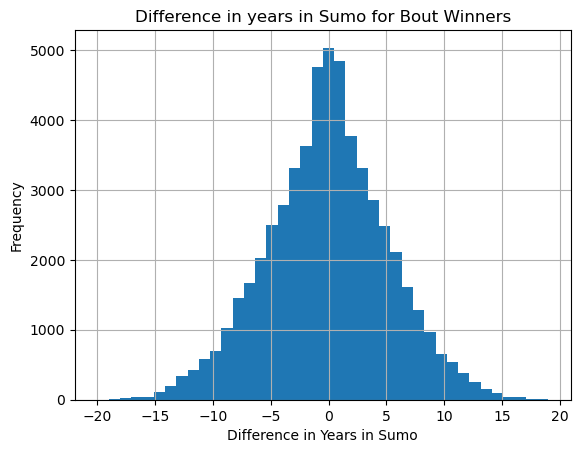

In [33]:
rikishi1_wins_after_2000_df['years_in_sumo_difference'].hist(bins=40)  # Change 'bins' to adjust the number of bars
plt.xlabel('Difference in Years in Sumo')
plt.ylabel('Frequency')
plt.title('Difference in years in Sumo for Bout Winners')
plt.show()

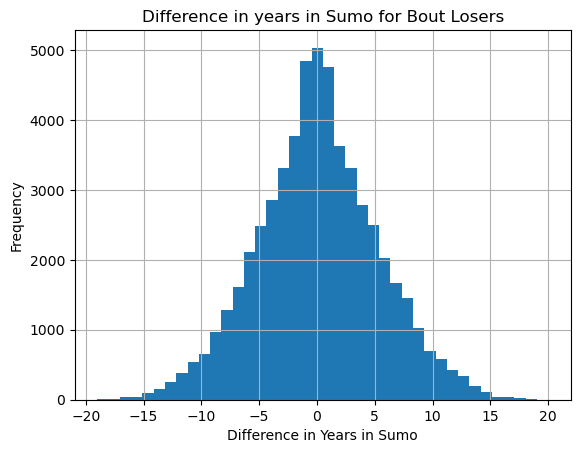

In [34]:
rikishi1_loses_after_2000_df['years_in_sumo_difference'].hist(bins=40)  # Change 'bins' to adjust the number of bars
plt.xlabel('Difference in Years in Sumo')
plt.ylabel('Frequency')
plt.title('Difference in years in Sumo for Bout Losers')
plt.show()

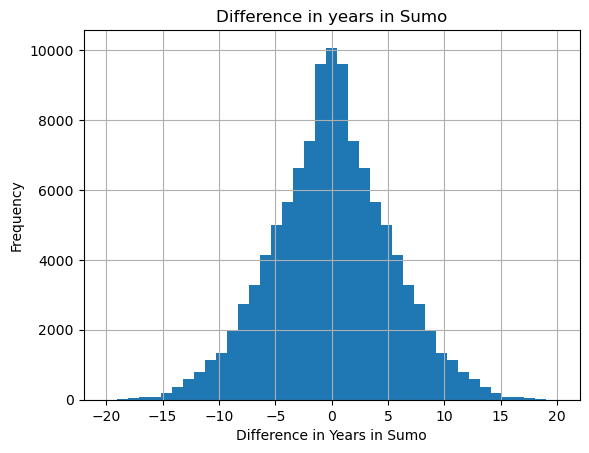

In [31]:
after2000df['years_in_sumo_difference'].hist(bins=41)  # Change 'bins' to adjust the number of bars
plt.xlabel('Difference in Years in Sumo')
plt.ylabel('Frequency')
plt.title('Difference in years in Sumo')
plt.show()

In [36]:
(rikishi1_wins_after_2000_df.years_in_sumo_difference > 0).mean()

np.float64(0.4535074573610219)

In [37]:
(rikishi1_wins_after_2000_df.years_in_sumo_difference < 0).mean()

np.float64(0.45673660172696784)